In [1]:

import tensorflow
import numpy

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
import matplotlib.pyplot as plt

from keras.models import Sequential 
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist


numpy.random.seed(42)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

/home/dmitry/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/dmitry/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/dmitry/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/dmitry/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dty

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Using TensorFlow backend.


In [2]:
x_train = x_train.reshape(60000, 784)
x_train = x_train.astype('float32')
x_train /= 255

y_train = np_utils.to_categorical(y_train, 10)


In [3]:
model = Sequential()

model.add(Dense(800, input_dim = 784, init = "normal", activation = "relu"))
model.add(Dense(10, init = "normal", activation = "softmax"))

model.compile(loss = "categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])
print(model.summary())






_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
None


/home/dmitry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(800, input_dim=784, activation="relu", kernel_initializer="normal")`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/dmitry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="softmax", kernel_initializer="normal")`
  after removing the cwd from sys.path.


In [4]:
history = model.fit(x_train, y_train, batch_size=200, epochs=20, verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/20
 - 4s - loss: 1.2037 - acc: 0.7260
Epoch 2/20
 - 1s - loss: 0.5962 - acc: 0.8620
Epoch 3/20
 - 1s - loss: 0.4728 - acc: 0.8807
Epoch 4/20
 - 1s - loss: 0.4165 - acc: 0.8909
Epoch 5/20
 - 1s - loss: 0.3826 - acc: 0.8980
Epoch 6/20
 - 1s - loss: 0.3593 - acc: 0.9027
Epoch 7/20
 - 1s - loss: 0.3418 - acc: 0.9062
Epoch 8/20
 - 1s - loss: 0.3279 - acc: 0.9096
Epoch 9/20
 - 1s - loss: 0.3162 - acc: 0.9122
Epoch 10/20
 - 1s - loss: 0.3062 - acc: 0.9155
Epoch 11/20
 - 1s - loss: 0.2974 - acc: 0.9179
Epoch 12/20
 - 1s - loss: 0.2895 - acc: 0.9200
Epoch 13/20
 - 1s - loss: 0.2824 - acc: 0.9221
Epoch 14/20
 - 1s - loss: 0.2758 - acc: 0.9243
Epoch 15/20
 - 2s - loss: 0.2697 - acc: 0.9259
Epoch 16/20
 - 2s - loss: 0.2642 - acc: 0.9275
Epoch 17/20
 - 2s - loss: 0.2588 - acc: 0.9290
Epoch 18/20
 - 2s - loss: 0.2538 - acc: 0.9299
Epoch 19/20
 - 2s - loss: 0.2490 - acc: 0.9312
Epoch 20/20
 - 2s - l

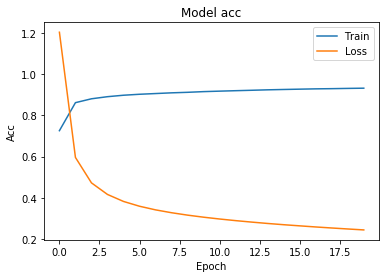

In [5]:
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title('Model acc')
plt.ylabel('Acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Loss'], loc='upper right')
plt.show()

In [6]:
x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test /= 255

y_test = np_utils.to_categorical(y_test, 10)

test_acc = model.evaluate(x_test,  y_test)

print('\nТочность на проверочных данных:', test_acc)


10000/10000 [==============================] - 1s 63us/step

Точность на проверочных данных: [0.23557390226125718, 0.9346]
